In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,log_loss 
import matplotlib.pyplot as plt

In [2]:
image=pd.read_csv('Image_Segmention.csv')
image

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,GRASS,36,243,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
205,GRASS,186,218,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
206,GRASS,197,236,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
207,GRASS,208,240,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [3]:
le=LabelEncoder()

In [4]:
image['Class']=le.fit_transform(image['Class'])

In [5]:
X=image.drop('Class',axis=1)
y=image['Class']

In [6]:
rf=RandomForestClassifier(random_state=23)

In [7]:
params={'max_features':[3,4,5,6]}

In [8]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [9]:
gcv_rf=GridSearchCV(rf,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [10]:
gcv_rf.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_features': [3, 4, 5, 6]}, scoring='neg_log_loss')

In [11]:
gcv_rf.best_params_

{'max_features': 5}

In [12]:
gcv_rf.best_score_

-0.2727397337808405

In [13]:
bm_rf=gcv_rf.best_estimator_

In [14]:
df_imp=pd.DataFrame({'variable':bm_rf.feature_names_in_,'importance':bm_rf.feature_importances_})

In [15]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by='importance')

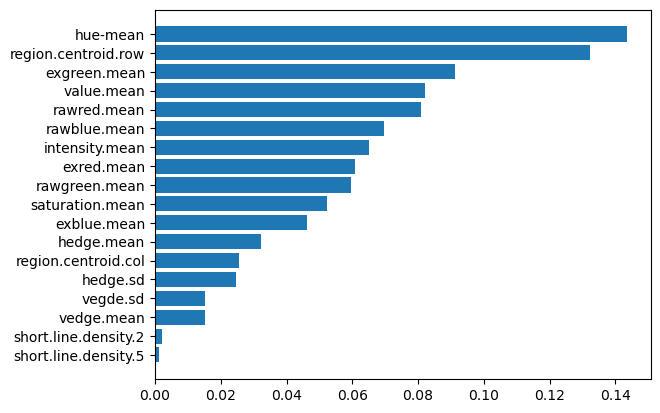

In [16]:
plt.barh(df_imp.variable,df_imp.importance)
plt.show()

# decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtc=DecisionTreeClassifier(random_state=23)

In [19]:
params={'max_depth':[2,3,4,5,6,None],'min_samples_leaf':[1,3,5,7,10,15],'min_samples_split': [2,5,10]}

In [20]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [21]:
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss')

In [22]:
gcv.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [23]:
gcv.best_score_

-1.1482365563250572

In [24]:
best_model=gcv.best_estimator_

In [25]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_ ,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,region.centroid.col,0.000000
1,region.centroid.row,0.271938
2,region.pixel.count,0.000000
3,short.line.density.5,0.000000
4,short.line.density.2,0.000000
5,vedge.mean,0.000000
6,vegde.sd,0.000000
7,hedge.mean,0.000000
8,hedge.sd,0.000000
9,intensity.mean,0.000000


In [26]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by="importance")
df_imp

,variable,importance
16,value.mean,0.184249
11,rawblue.mean,0.271789
1,region.centroid.row,0.271938
15,exgreen.mean,0.272023


In [27]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by="importance")
df_imp

,variable,importance
16,value.mean,0.184249
11,rawblue.mean,0.271789
1,region.centroid.row,0.271938
15,exgreen.mean,0.272023


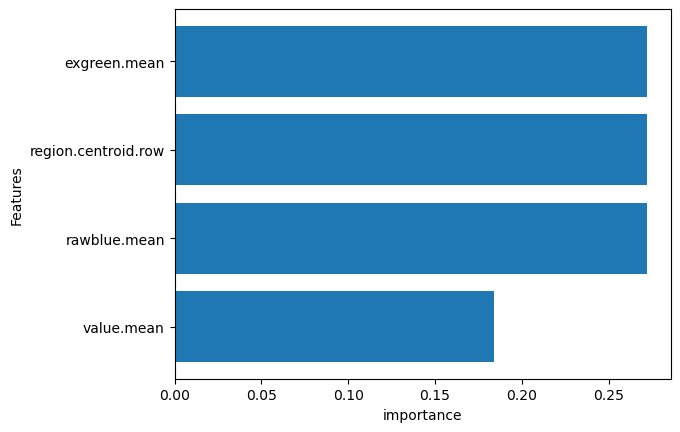

In [28]:
plt.barh(df_imp['variable'],df_imp['importance'])
plt.xlabel("importance")
plt.ylabel('Features')
plt.show()